# Homework 08 - Jason Li

Woooo last one!!!

## 2.

### Accuracy

Accuracy is given by the number of true negatives and true positives divided by the number of all predictions (true and false, positives and negatives).

In other words, the proportions of predictions that are correct.

This would be most appropriate for something like a spam email detector. We would care most about how often it was correct for both positives and negatives.

### Sensitivity

Sensitivity is given by the number of predicted true positives divided by the number of total positives (true positives and false negatives).

In other words, how many positives that it could predict.

This would be most appropriate for something like the COVID rapid tests in the middle of the pandemic. We would care more that it could correctly identify positives, and less so about negatives.

### Specificity

Specificity is given by the number of predicted true negatives divided by the number of total negatives (true negatives and false positives).

In other words, how many negatives that it could predict.

This would be most appropriate for something like determining whether or not to proceed with a surgery. It is worse to perform the surgery when you shouldn't have.

### Precision

Precision is given by the number of true positives divided by the number of true and false positives.

This wuld be most appropriate for something like an email alert system flags critical security incidents (e.g., a cyberattack) for an IT team to investigate.

## 3.

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

In [2]:
ab

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight_oz
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,8.0,5.2,1.4,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,9.3,6.6,1.1,24.0
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,9.1,6.1,0.7,8.0
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,8.0,5.4,0.7,6.4
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,10.7,8.9,0.9,14.4


## 4.

In [3]:
# Create the training and testing sets
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab.dropna(), test_size=0.2, random_state=42
)

In [4]:
# Report the number of observations in each dataset
print(f"Number of observations in the training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in the testing set: {len(ab_reduced_noNaN_test)}")

Number of observations in the training set: 248
Number of observations in the testing set: 62


In the code cell below:

1. The first line converts the categorical column `Hard_or_Paper` into a binary variable. (0 for paper, 1 for hard)
2. The second line takes `X` to be a dataframe of just the `List Price` column. This is used as the predictor for the classification.

Use `ab_reduced_noNaN_train` to initially fit the classification tree. This way, we train it with 80% of our data and still have 20% of our data to test our classification tree with.

In [5]:
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X = ab_reduced_noNaN_train[['List Price']]

In [6]:
# Initialize the DecisionTreeClassifier with a maximum depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier on the data
clf.fit(X, y)


DecisionTreeClassifier(max_depth=2, random_state=42)

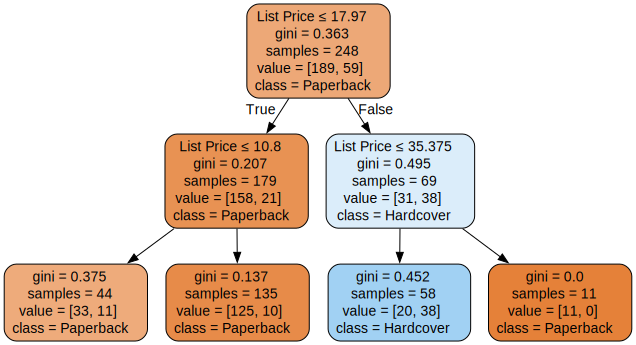

In [7]:
# Visualize the trained decision tree using Graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=['List Price'],  
                                class_names=['Paperback', 'Hardcover'],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = gv.Source(dot_data)  
graph.render("decision_tree", format="png")  # This saves the tree visualization as a .pdf file
display(graph)

1. Check if the list price $\leq \$17.97$.
    1. If so, check if the list price $\leq \$10.8$.
        1. If so, likely to be paperback, with a gini index of $0.375$.
        2. Else, still likely to be paperback, with a gini index of $0.137$.
    2. Else, check if the list price $\leq \$35.375$.
        1. If so, likely to be hardcover, with a gini index of $0.452$.
        2. Else, likely to be paperback again, with a gini index of $0.0$.

The gini index is a measure of uncertainty or impurity.\
The closer to 0, the more that the node is pure (all samples belong to the same class).\
The closer to 1, the more that the node is impure (the classes are mixed).

## 5.

In [8]:
# Specify the predictor variables and response variable
X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

# Train the DecisionTreeClassifier with max_depth set to 4
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

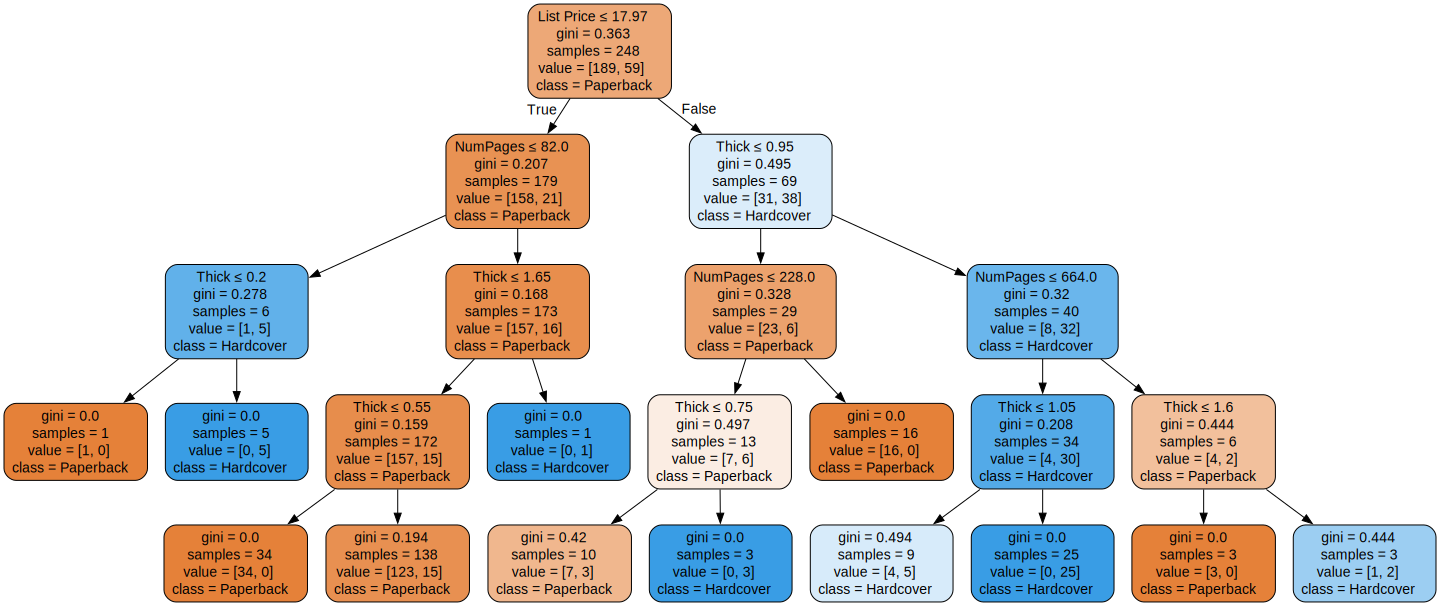

In [9]:

dot_data2 = tree.export_graphviz(
    clf2,
    out_file=None,
    feature_names=X.columns,
    class_names=["Paperback", "Hardcover"],
    filled=True,
    rounded=True,
    special_characters=True
)
graph2 = gv.Source(dot_data2)
display(graph2)

## 6.

In [10]:
# Prepare the test data
X_test_clf = ab_reduced_noNaN_test[['List Price']]
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Predict using clf
y_pred_clf = clf.predict(X_test_clf)

# Predict using clf2
y_pred_clf2 = clf2.predict(X_test_clf2)

Text(0.5, 1.0, 'Confusion Matrix for clf')

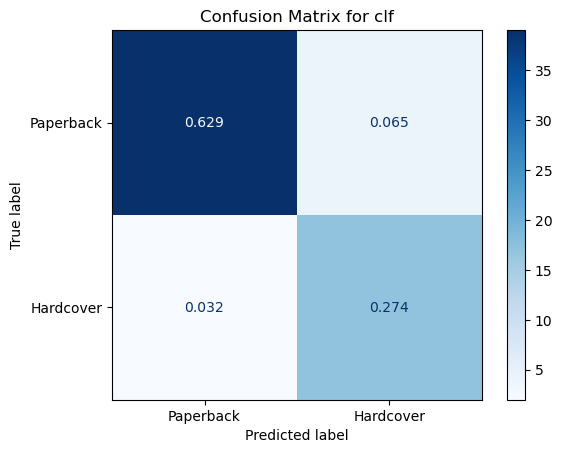

In [11]:
# Generate confusion matrices
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=["Paperback", "Hardcover"])
disp_clf.plot(cmap="Blues")

# Format text annotations to three significant digits
for i in range(cm_clf.shape[0]):
    for j in range(cm_clf.shape[1]):
        disp_clf.text_[i, j].set_text(f"{cm_clf[i, j] / cm_clf.sum():.3f}")

disp_clf.ax_.set_title("Confusion Matrix for clf")


Text(0.5, 1.0, 'Confusion Matrix for clf2')

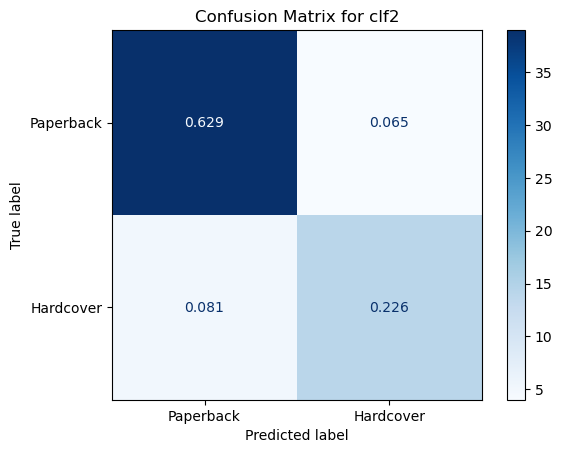

In [12]:
# Confusion matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=["Paperback", "Hardcover"])
disp_clf2.plot(cmap="Blues")

# Format text annotations to three significant digits
for i in range(cm_clf2.shape[0]):
    for j in range(cm_clf2.shape[1]):
        disp_clf2.text_[i, j].set_text(f"{cm_clf2[i, j] / cm_clf2.sum():.3f}")

disp_clf2.ax_.set_title("Confusion Matrix for clf2")

In [13]:
# Calculate metrics for clf
tp_clf = cm_clf[1, 1]  # True Positives
tn_clf = cm_clf[0, 0]  # True Negatives
fp_clf = cm_clf[0, 1]  # False Positives
fn_clf = cm_clf[1, 0]  # False Negatives

accuracy_clf = (tp_clf + tn_clf) / cm_clf.sum()
sensitivity_clf = tp_clf / (tp_clf + fn_clf) if (tp_clf + fn_clf) > 0 else 0
specificity_clf = tn_clf / (tn_clf + fp_clf) if (tn_clf + fp_clf) > 0 else 0

# Calculate metrics for clf2
tp_clf2 = cm_clf2[1, 1]  # True Positives
tn_clf2 = cm_clf2[0, 0]  # True Negatives
fp_clf2 = cm_clf2[0, 1]  # False Positives
fn_clf2 = cm_clf2[1, 0]  # False Negatives

accuracy_clf2 = (tp_clf2 + tn_clf2) / cm_clf2.sum()
sensitivity_clf2 = tp_clf2 / (tp_clf2 + fn_clf2) if (tp_clf2 + fn_clf2) > 0 else 0
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2) if (tn_clf2 + fp_clf2) > 0 else 0

# Rport metrics
print("Metrics for clf:")
print(f"  Accuracy: {accuracy_clf:.2f}")
print(f"  Sensitivity: {sensitivity_clf:.2f}")
print(f"  Specificity: {specificity_clf:.2f}\n")

print("Metrics for clf2:")
print(f"  Accuracy: {accuracy_clf2:.2f}")
print(f"  Sensitivity: {sensitivity_clf2:.2f}")
print(f"  Specificity: {specificity_clf2:.2f}")

Metrics for clf:
  Accuracy: 0.90
  Sensitivity: 0.89
  Specificity: 0.91

Metrics for clf2:
  Accuracy: 0.85
  Sensitivity: 0.74
  Specificity: 0.91


## 7.

The code provided creates confusion matrices on the training data. It uses the classifiers to predict the outcomes for the training data instead of the testing data. We care more about how the classifiers perform on the testing data (new data it hasn't seen before), rather than what it was trained on. We can expect the classifier to perform better on the training data than the testing data, since the training data was what it was trained on and the testing data is new data, but the confusion matrices on the testing data is more important to us.

## Chatbot summary and transcript

Transcript: https://chatgpt.com/share/673fae9f-1654-8010-bf90-2aa6845b31c1

Summary:


### Summary of Interactions

#### 1. **Dataset Setup and Splitting**  
- Loaded a dataset from a URL using Pandas.  
- Created training (`ab_reduced_noNaN_train`) and testing (`ab_reduced_noNaN_test`) datasets with an 80/20 split using `train_test_split`.

#### 2. **Initial Model Setup**  
- Used `X = ab_reduced_noNaN[['List Price']]` and `y = pd.get_dummies(ab_reduced_noNaN['Hard_or_Paper'])['H']` to prepare features and target variables.  
- Trained a `DecisionTreeClassifier` model (`clf`) with `max_depth=2`, using only the `List Price` variable.  

#### 3. **Model Visualization**  
- Visualized `clf` using both `tree.plot_tree` and `graphviz`.  
- Explained how `List Price` was used to make predictions (e.g., splitting thresholds for classification).

#### 4. **Expanded Model Setup**  
- Added additional features (`NumPages`, `Thick`, `List Price`) to train a second `DecisionTreeClassifier` model (`clf2`) with `max_depth=4`.  

#### 5. **Evaluation Using Confusion Matrices**  
- Used the testing dataset (`ab_reduced_noNaN_test`) to evaluate both models (`clf` and `clf2`).  
- Computed confusion matrices for both models and visualized them with `ConfusionMatrixDisplay`.

#### 6. **Performance Metrics**  
- Calculated **accuracy**, **sensitivity**, and **specificity** for both models using the confusion matrices.  

#### 7. **Confusion Matrix Display Customization**  
- Updated the confusion matrix visualization to show decimal proportions (rounded to three significant digits) instead of raw counts or percentages.

#### Key Topics Covered:
- Data preprocessing and splitting.
- Decision tree training and visualization.
- Performance evaluation using confusion matrices.
- Metric computation and interpretation (accuracy, sensitivity, specificity).
- Visualization customization for clarity and reporting.

This summary outlines the step-by-step workflow and interactions for the assignment. Let me know if any sections need further elaboration!